# Global Pollution Analysis and Energy Recovery

In [1]:
# General Libraties
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sklearn Libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report

# Phase 1 - Data Preprocessing

## Data Import and Cleaning
1. Load the dataset (Global_Pollution_Analysis.csv).
2. Handle missing data and outliers using appropriate imputation methods.
3. Normalize/standardize features such as CO2 emissions and industrial waste.
4. Encode categorical features like country and year using LabelEncoder.

In [2]:
# Loading the Dataset 
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [3]:
# Checking for missing values in all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

In [4]:
# Normalize/Standardize
df_standard = df.copy(deep = True)

standardizer = MinMaxScaler()
continuous_columns = df[['CO2_Emissions (in MT)', 'Industrial_Waste (in tons)']].columns
df_standard[continuous_columns] = standardizer.fit_transform(df[continuous_columns])
df_standard.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37


In [5]:
# Label Encoding
label_encoder = LabelEncoder()
encoding_columns = ['Country','Year']
for col in encoding_columns:
    df_standard[col] = label_encoder.fit_transform(df_standard[col])
df_standard.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,77,5,272.70,124.27,51.95,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96
1,147,1,86.72,60.34,117.22,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41
2,136,16,91.59,83.36,121.72,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15
3,38,18,280.61,67.16,93.58,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51
4,46,8,179.16,127.53,121.55,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37


## Feature Engineering
1. Create new features like energy consumption per capita and yearly pollution trends.
2. Apply feature scaling to pollution indices (air, water, soil pollution).

In [6]:
# Creating new features like energy consumption per capita 
df_temp =pd.DataFrame()

df_temp['Energy_Intersity'] = df['Energy_Consumption_Per_Capita (in MWh)'] / df['GDP_Per_Capita (in USD)']
df_temp['Waste_To_Energy_Ratio']  = round(df['Energy_Recovered (in GWh)'] / df['Industrial_Waste (in tons)'] * 100,2)
df_temp['Plastic_Waste_Per_Capita'] = df['Plastic_Waste_Produced (in tons)'] / df['Population (in millions)']
df_temp['CO2_Emission_Per_Capita'] = df['CO2_Emissions (in MT)'] / df['Population (in millions)']


new_feature_columns = df_temp.columns
df_standard[new_feature_columns] = df_temp[new_feature_columns]
df_standard.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Energy_Intersity,Waste_To_Energy_Ratio,Plastic_Waste_Per_Capita,CO2_Emission_Per_Capita
0,77,5,272.70,124.27,51.95,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,0.000599,0.17,878.230223,0.125533
1,147,1,86.72,60.34,117.22,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,0.000150,0.88,241.371220,0.046193
2,136,16,91.59,83.36,121.72,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,0.000228,0.87,151.068209,0.399213
3,38,18,280.61,67.16,93.58,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,0.000036,0.19,135.431711,0.131416
4,46,8,179.16,127.53,121.55,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,0.000310,0.05,210.353421,0.080045


In [7]:
# Feature scaling Air, Water and Soil Pollution Index
df_standard[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']] = standardizer.fit_transform(df_standard[['Air_Pollution_Index','Water_Pollution_Index','Soil_Pollution_Index']])
df_standard.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Energy_Intersity,Waste_To_Energy_Ratio,Plastic_Waste_Per_Capita,CO2_Emission_Per_Capita
0,77,5,0.898042,0.553778,0.295481,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,0.000599,0.17,878.230223,0.125533
1,147,1,0.147062,0.173673,0.768178,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,0.000150,0.88,241.371220,0.046193
2,136,16,0.166727,0.310542,0.800768,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,0.000228,0.87,151.068209,0.399213
3,38,18,0.929982,0.214222,0.596973,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,0.000036,0.19,135.431711,0.131416
4,46,8,0.520331,0.573161,0.799537,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,0.000310,0.05,210.353421,0.080045


## Phase 2 - Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree

### Creating a feature of Pollution Severity based on Air, Water and Soil Pollution Index 

In [8]:
pollution_total = df_standard[['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']].sum(axis = 1)
df_standard['Severity'] = pd.qcut(pollution_total, q=3, labels = ['low','medium','high'])
df_standard

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD),Energy_Intersity,Waste_To_Energy_Ratio,Plastic_Waste_Per_Capita,CO2_Emission_Per_Capita,Severity
0,77,5,0.898042,0.553778,0.295481,0.949995,158.14,0.070756,41.11,37078.88,12.56,42.22,20972.96,0.000599,0.17,878.230223,0.125533,high
1,147,1,0.147062,0.173673,0.768178,0.559811,498.04,0.092527,36.44,33128.20,5.23,137.25,34850.41,0.000150,0.88,241.371220,0.046193,low
2,136,16,0.166727,0.310542,0.800768,0.559529,489.51,1.000000,9.38,18803.46,13.15,124.47,57773.15,0.000228,0.87,151.068209,0.399213,low
3,38,18,0.929982,0.214222,0.596973,0.748028,145.18,0.146326,18.97,9182.27,0.78,67.80,21837.51,0.000036,0.19,135.431711,0.131416,high
4,46,8,0.520331,0.573161,0.799537,0.768261,40.38,0.272347,34.00,39235.12,12.84,186.52,41379.37,0.000310,0.05,210.353421,0.080045,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,92,4,0.264648,0.283132,0.225884,0.491126,81.23,0.061336,17.38,4065.66,6.28,92.96,14818.18,0.000424,0.16,43.735585,0.052173,low
196,13,2,0.288795,0.534158,0.382387,0.746306,25.89,0.927360,16.56,36905.26,15.18,114.02,59238.04,0.000256,0.03,323.673566,0.405367,low
197,88,11,0.401494,0.688448,0.187500,0.018228,293.27,0.764915,38.36,24700.29,14.11,183.06,28895.94,0.000488,10.40,134.930023,0.210095,low
198,170,2,0.754694,0.490517,0.657662,0.686056,305.61,0.563115,32.17,1443.62,12.44,40.65,17068.01,0.000729,0.44,35.513407,0.708979,high


### Data Splitting
1. Splitting the dataset into data and target sets
2. Splitting data and target sets into 75% training set and 25% testing set

In [9]:
X = df_standard.drop('Severity', axis=1)
Y = df_standard['Severity']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

### 1. Naive Bayes Classifier
1. Implement Multinomial Naive Bayes to classify countries based on pollution severity (Low, Medium, High).
2. **Evaluation Metrics**: Accuracy, Confusion Matrix, Precision, Recall, F1-score.

In [10]:
# Model Creation
model_nb = MultinomialNB()

# Model Training
model_nb.fit(x_train, y_train)

# Target Prediction
y_pred_nb = model_nb.predict(x_test)

# Performance Metrices
print(f"Accuracy: {round(accuracy_score(y_test, y_pred_nb)*100,2)}%")
print(f"Precision: {round(precision_score(y_test, y_pred_nb, average='weighted')*100,2)}%")
print(f"F1 Score: {round(f1_score(y_test, y_pred_nb, average='weighted'),3)}")
print(f"Recall: {recall_score(y_test, y_pred_nb, average='weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_nb)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred_nb)}")

Accuracy: 40.0%
Precision: 42.5%
F1 Score: 0.38
Recall: 0.4
Confusion Matrix: 
[[ 3  6  8]
 [ 2  7  6]
 [ 1  7 10]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.50      0.18      0.26        17
         low       0.35      0.47      0.40        15
      medium       0.42      0.56      0.48        18

    accuracy                           0.40        50
   macro avg       0.42      0.40      0.38        50
weighted avg       0.42      0.40      0.38        50



### 2. K-Nearest Neighbors (KNN)
1. Apply the KNN classifier for categorizing pollution levels based on pollution indices.
2. **Hyperparameter Tuning**: Determine the optimal number of neighbors (K) for better classification accuracy.
3. **Evaluation Metrics**: Accuracy, Confusion Matrix, Precision, Recall, F1-score.

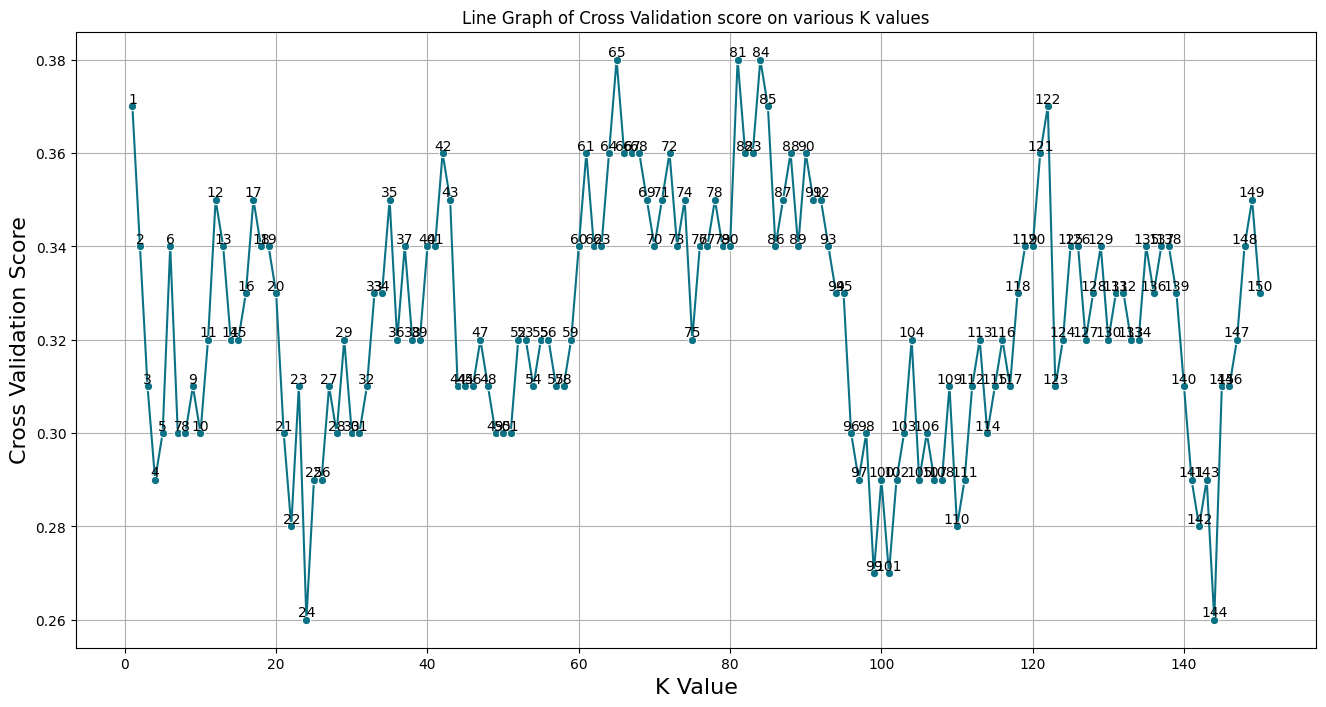

In [11]:
# Determine the optimal K value for classification accuracy
k_list = list(range(1, len(x_train)+1))
scores = []
for k in k_list:
    model_knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(model_knn, X, Y, cv = 5)
    scores.append(round(score.mean(), 2))

score_df = pd.DataFrame({
    'k': k_list,
    'score': scores
})

# Plotting K vs score
plt.figure(figsize = (16,8))
sns.lineplot(score_df, x = 'k', y = 'score', marker = 'o', color = '#0b7285')

for i in range(len(score_df)):
    x = score_df['k'][i]
    y = score_df['score'][i]

    plt.text(x, y, f"{x}", ha='center',va = 'bottom', fontsize=10)

plt.grid(True)
plt.title("Line Graph of Cross Validation score on various K values")
plt.xlabel('K Value', fontsize=16)
plt.ylabel('Cross Validation Score', fontsize=16)
plt.savefig("Line Graph of Cross Validation score on various K values")
plt.show()

In [12]:
# Model Creation taking k = 65 ad above cross validation shows k = 65, 81 and 84 is securing high scores.
model_knn = KNeighborsClassifier(n_neighbors=65)

# Model training
model_knn.fit(x_train, y_train)

# Target Prediction
y_pred_knn = model_knn.predict(x_test)

# Performance Metrices
print(f"Accuracy: {round(accuracy_score(y_test, y_pred_knn)*100,2)}%")
print(f"Precision: {round(precision_score(y_test, y_pred_knn, average='weighted')*100,2)}%")
print(f"F1 Score: {round(f1_score(y_test, y_pred_knn, average='weighted'),3)}")
print(f"Recall: {recall_score(y_test, y_pred_knn, average='weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred_knn)}")

Accuracy: 30.0%
Precision: 18.21%
F1 Score: 0.217
Recall: 0.3
Confusion Matrix: 
[[ 4 13  0]
 [ 4 11  0]
 [ 8 10  0]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.25      0.24      0.24        17
         low       0.32      0.73      0.45        15
      medium       0.00      0.00      0.00        18

    accuracy                           0.30        50
   macro avg       0.19      0.32      0.23        50
weighted avg       0.18      0.30      0.22        50



C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

### 3. Decision Tree
1. Build a Decision Tree classifier to classify countries into pollution severity categories.
2. **Hyperparameter Tuning**: Tune the tree using parameters like max_depth and min_samples_split to improve performance.
3. **Evaluation Metrics**: Accuracy, Confusion Matrix, Precision, Recall, F1-score.

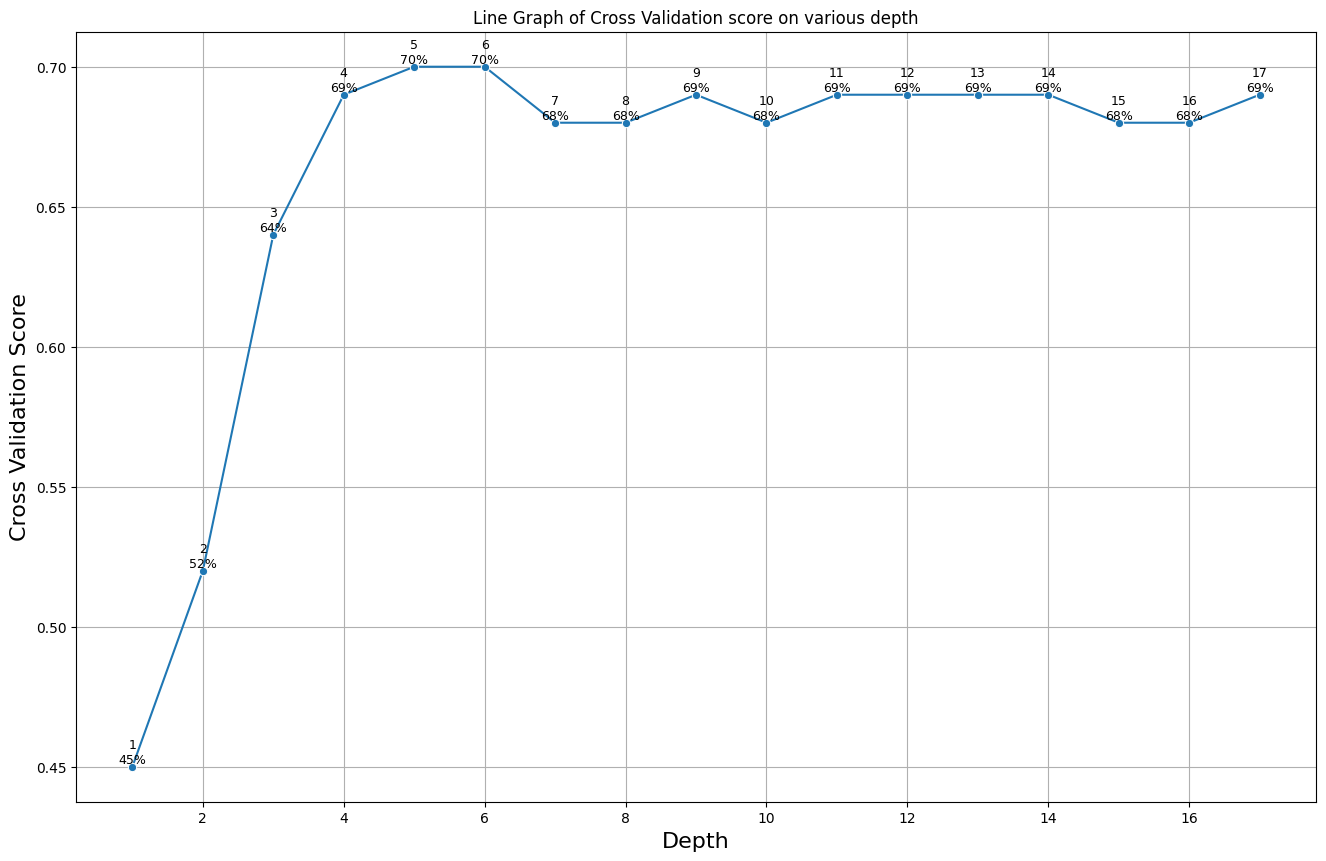

In [13]:
# Determining the optimal depth for classification
depth_list = list(range(1, len(X.columns)+1))
scores = []

for depth in depth_list:
    model_dt = DecisionTreeClassifier(criterion='gini', max_depth=depth, min_samples_split=20)
    score = cross_val_score(model_dt, X, Y, cv = 5)
    scores.append(round(score.mean(), 2))

score_df = pd.DataFrame({
    'depth': depth_list,
    'score': scores
})

plt.figure(figsize = (16,10))
sns.lineplot(score_df, x = 'depth', y = 'score', marker = 'o')

for i in range(len(score_df)):
    x = score_df['depth'][i]
    y = score_df['score'][i]

    plt.text(x, y, f"{x}\n{y*100:.0f}%", ha='center', va='bottom', fontsize=9)

plt.grid(True)
plt.title("Line Graph of Cross Validation score on various depth")
plt.xlabel('Depth', fontsize=16)
plt.ylabel('Cross Validation Score', fontsize=16)
plt.savefig("Line Graph of Cross Validation score on various depth")
plt.show()

In [14]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=4, min_samples_split=20)
model_dt.fit(x_train, y_train)
y_pred_dt = model_dt.predict(x_test)

print(f"Accuracy: {round(accuracy_score(y_test, y_pred_dt)*100,2)}%")
print(f"Precision: {round(precision_score(y_test, y_pred_dt, average='weighted')*100,2)}%")
print(f"F1 Score: {round(f1_score(y_test, y_pred_dt, average='weighted'),3)}")
print(f"Recall: {recall_score(y_test, y_pred_dt, average='weighted')}")
print(f"Confusion Matrix: \n{confusion_matrix(y_test, y_pred_dt)}")
print(f"Classification Report: \n {classification_report(y_test, y_pred_dt)}")


Accuracy: 72.0%
Precision: 72.78%
F1 Score: 0.723
Recall: 0.72
Confusion Matrix: 
[[14  0  3]
 [ 0 10  5]
 [ 2  4 12]]
Classification Report: 
               precision    recall  f1-score   support

        high       0.88      0.82      0.85        17
         low       0.71      0.67      0.69        15
      medium       0.60      0.67      0.63        18

    accuracy                           0.72        50
   macro avg       0.73      0.72      0.72        50
weighted avg       0.73      0.72      0.72        50



## Phase 3 - Reporting and Insights

### 1. Model Comparison
1. Compare the performance of the three classifiers based on accuracy, confusion matrix, and other relevant metrics.
2. Visualize the results using confusion matrices and classification reports.

C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


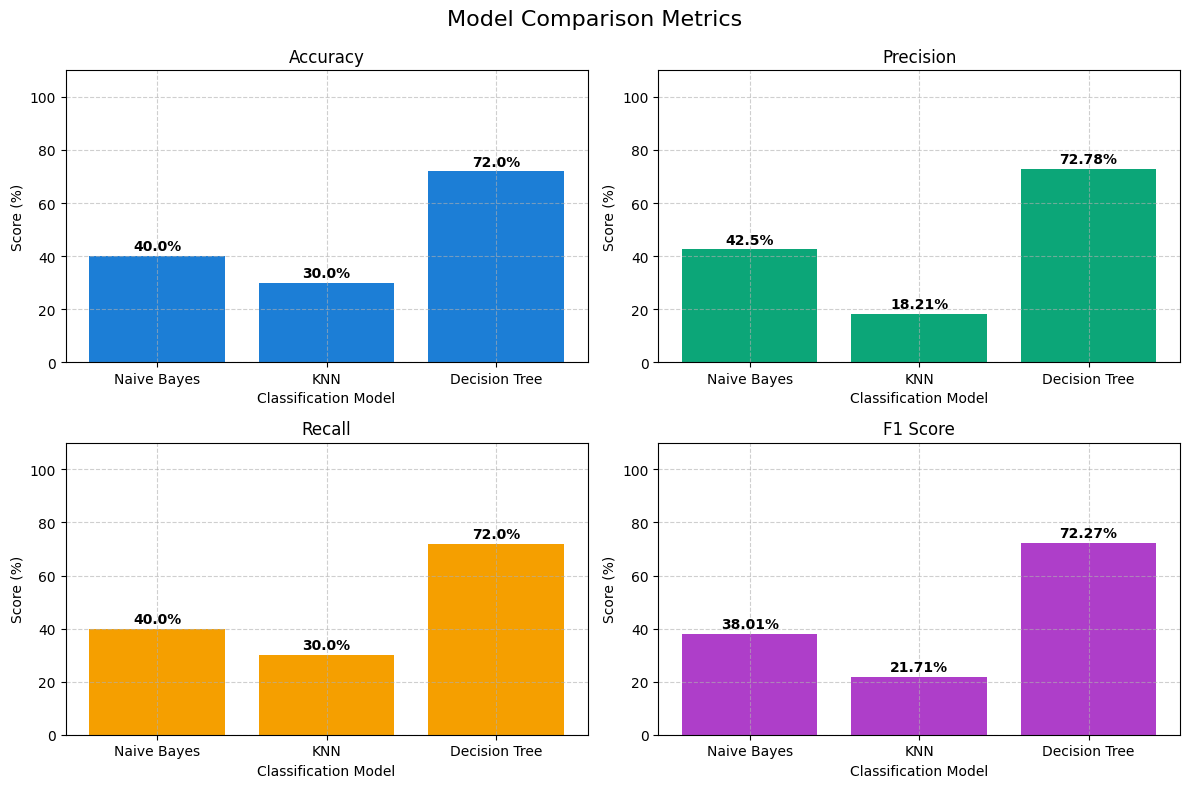

In [15]:
# Metrics for each model
models = ['Naive Bayes', 'KNN', 'Decision Tree']
accuracy = [round(accuracy_score(y_test, y_pred_nb)*100, 2), 
            round(accuracy_score(y_test, y_pred_knn)*100, 2), 
            round(accuracy_score(y_test, y_pred_dt)*100, 2)
]
precision = [round(precision_score(y_test, y_pred_nb, average='weighted')*100, 2), 
             round(precision_score(y_test, y_pred_knn, average='weighted')*100, 2), 
             round(precision_score(y_test, y_pred_dt, average='weighted')*100, 2)
]
recall = [round(recall_score(y_test, y_pred_nb, average='weighted')*100, 2), 
          round(recall_score(y_test, y_pred_knn, average='weighted')*100, 2), 
          round(recall_score(y_test, y_pred_dt, average='weighted')*100, 2)
]
f1 = [round(f1_score(y_test, y_pred_nb, average='weighted')*100, 2), 
            round(f1_score(y_test, y_pred_knn, average='weighted')*100, 2), 
            round(f1_score(y_test, y_pred_dt, average='weighted')*100, 2)
]

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Function to add annotations
def annotate_bars(ax, values):
    for i, val in enumerate(values):
        ax.text(i, val + 1, f'{val}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Accuracy
axs[0, 0].bar(models, accuracy, color='#1c7ed6')
axs[0, 0].set_title('Accuracy')
axs[0, 0].set_ylim(0, 110)
annotate_bars(axs[0, 0], accuracy)

# Precision
axs[0, 1].bar(models, precision, color='#0ca678')
axs[0, 1].set_title('Precision')
axs[0, 1].set_ylim(0, 110)
annotate_bars(axs[0, 1], precision)

# Recall
axs[1, 0].bar(models, recall, color='#f59f00')
axs[1, 0].set_title('Recall')
axs[1, 0].set_ylim(0, 110)
annotate_bars(axs[1, 0], recall)

# F1 Score
axs[1, 1].bar(models, f1, color='#ae3ec9')
axs[1, 1].set_title('F1 Score')
axs[1, 1].set_ylim(0, 110)
annotate_bars(axs[1, 1], f1)

# Formatting
for ax in axs.flat:
    ax.set_ylabel('Score (%)')
    ax.set_xlabel('Classification Model')
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
fig.suptitle('Model Comparison Metrics', fontsize=16)
plt.savefig('Model Comparison Metrics')
plt.show()

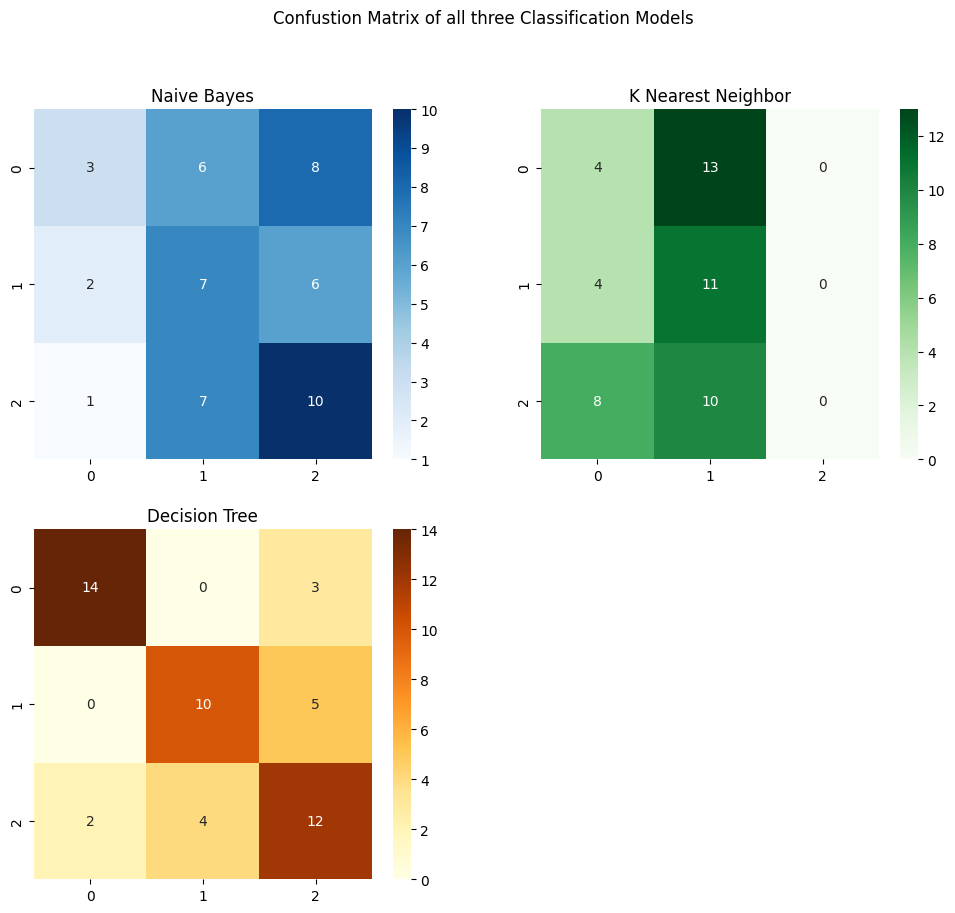

In [16]:
#  Confusion Matrices of all the models
cf_nb = confusion_matrix(y_test, y_pred_nb)
cf_knn = confusion_matrix(y_test, y_pred_knn)
cf_dt = confusion_matrix(y_test, y_pred_dt)

# Plotting all the metrices
fig, ax = plt.subplots(2,2, figsize=(12,10))
ax = ax.ravel()

cfm_plot = {
    'cfm_model' : [cf_nb, cf_knn, cf_dt],
    'cfm_title' : ['Naive Bayes', 'K Nearest Neighbor', 'Decision Tree'],
    'cmap' : ['Blues', 'Greens', 'YlOrBr']
}

for i in range(3):
    sns.heatmap(cfm_plot['cfm_model'][i], annot=True, fmt='d', cmap=cfm_plot['cmap'][i], ax=ax[i])
    ax[i].set_title(cfm_plot['cfm_title'][i])

fig.delaxes(ax[3])

fig.suptitle('Confustion Matrix of all three Classification Models')
plt.savefig('Confustion Matrix of all three Classification Models')
plt.show()

C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\boss2\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

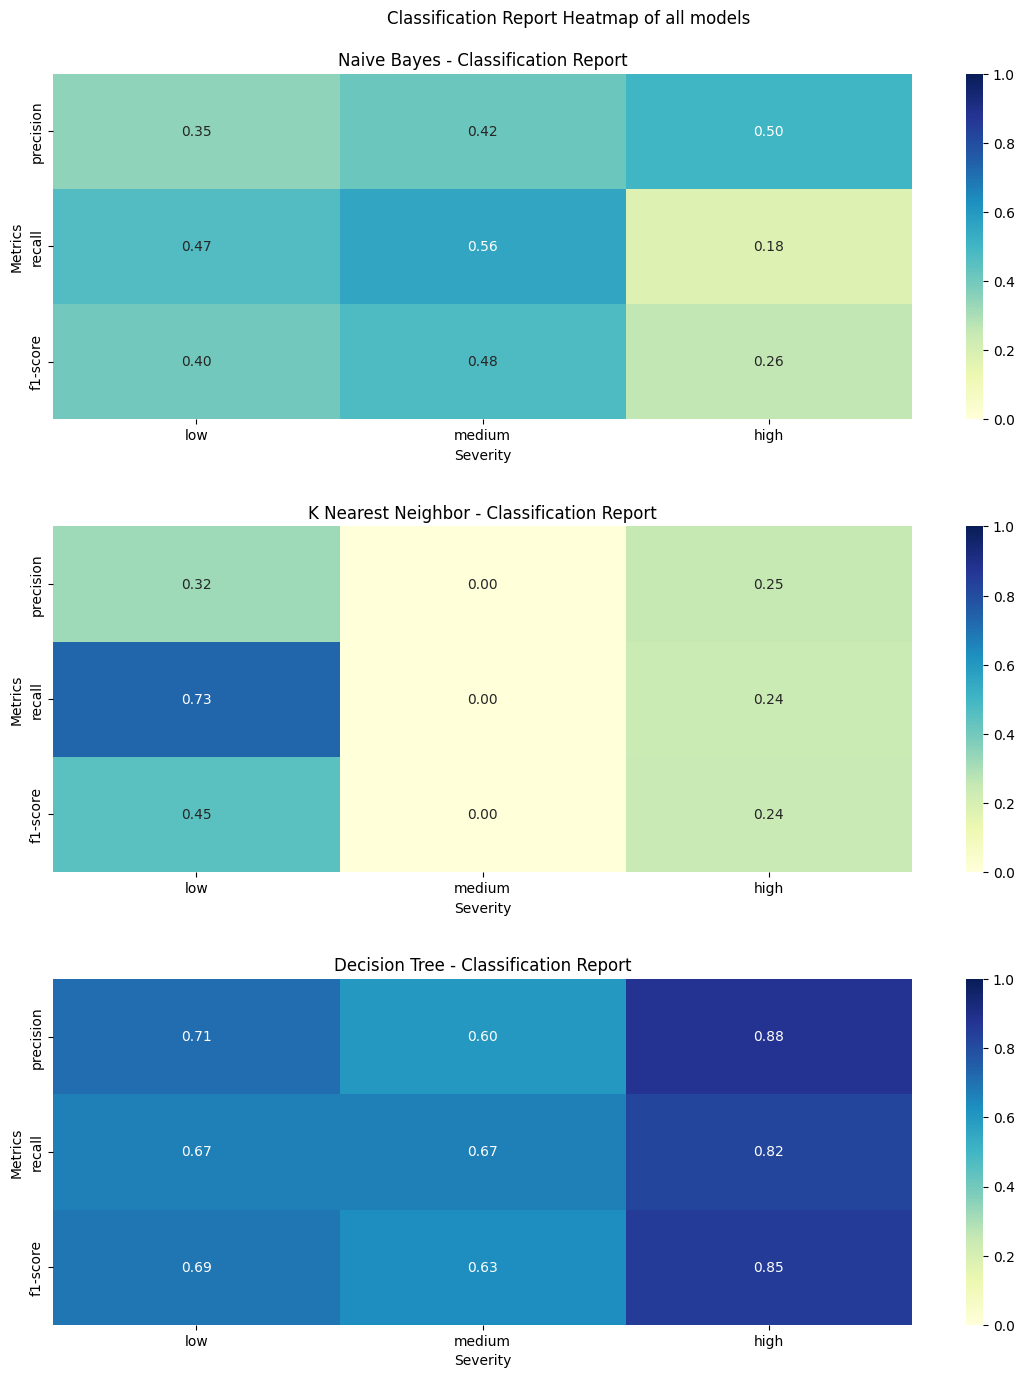

In [17]:
# Creating Classification Report

report = [classification_report(y_test, y_pred_nb, output_dict=True),
          classification_report(y_test, y_pred_knn, output_dict=True),
          classification_report(y_test, y_pred_dt, output_dict=True)]

title = ['Naive Bayes', 'K Nearest Neighbor', 'Decision Tree']

classes = ['low', 'medium', 'high']

fig, ax = plt.subplots(3,1, figsize = (12,14))

for i, rep in enumerate(report):
    filtered_rep = {cls: rep[cls] for cls in classes}
    report_df = pd.DataFrame(filtered_rep).loc[['precision', 'recall', 'f1-score']]
    
    sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt=".2f", ax=ax[i], vmin=0, vmax=1)
    ax[i].set_title(f"{title[i]} - Classification Report")
    ax[i].set_ylabel("Metrics")
    ax[i].set_xlabel("Severity")
    
plt.tight_layout(pad=3)
fig.suptitle("Classification Report Heatmap of all models", y=1.0001)
plt.savefig("Classification Report Heatmap")
plt.show()

### 2. Actionable Insights
1. Highlight key findings about pollution levels in different countries and how they impact energy recovery.
2. Recommend policies for reducing pollution based on model insights.

### 📊 Actionable Insights and Recommendations

#### 🔍 Key Findings on Pollution and Energy Recovery

- Countries with **higher pollution levels** (as indicated by air, water, and soil pollution indices) often exhibit **inconsistent patterns in energy recovery**.
- Despite having substantial **industrial waste**, several countries with high pollution fail to recover energy effectively—pointing to inefficiencies in waste-to-energy infrastructure.
- The dataset suggests that **higher renewable energy percentages** tend to correlate with **lower pollution severity**, indicating the **positive environmental impact of clean energy investments**.
- Some countries with moderate pollution but high CO₂ emissions indicate **over-reliance on fossil fuels** without sufficient mitigation efforts.

---

#### 🛡️ Policy Recommendations Based on Model Insights

1. **Invest in Waste-to-Energy Technologies**:
   - Enhance infrastructure in countries with high industrial waste but low energy recovery.
   - Encourage public-private partnerships for waste treatment and energy conversion.

2. **Promote Renewable Energy Adoption**:
   - Offer tax incentives or subsidies for solar, wind, and biomass energy.
   - Set country-level renewable energy targets and monitor progress annually.

3. **Targeted Pollution Control Measures**:
   - Countries classified as “High” severity by the models should be prioritized for pollution audits and control measures.
   - Implement stricter emission norms for industries in high-severity zones.

4. **Education & Awareness Campaigns**:
   - Encourage industries and the public to reduce plastic waste and adopt sustainable practices.

5. **Policy-Driven Monitoring**:
   - Use ML model outputs to **identify at-risk regions** and perform **real-time monitoring** of environmental KPIs.

---

### 📈 Model Performance Summary

| Model              | Accuracy | Precision | Recall | F1 Score |
|-------------------|----------|-----------|--------|----------|
| **Naive Bayes**    | 40.0%    | 42.5%     | 40.0%  | 38.0%    |
| **K-Nearest Neighbors** | 30.0%    | 18.21%    | 30.0%  | 21.7%    |
| **Decision Tree**  | 72.0%    | 72.78%    | 72.0%  | 72.3%    |

#### ✅ Conclusion:
- The **Decision Tree model** significantly outperformed others in classifying pollution severity.
- **Naive Bayes** showed moderate performance but lacks the flexibility to model complex patterns.
- **KNN** underperformed, likely due to high feature dimensionality and data scaling issues.

➡️ Future work could involve feature selection, ensemble methods, or deeper tree-based models like Random Forests or XGBoost for even better classification accuracy.
